In [93]:
# Import libraries
import time
import numpy as np

import numpy.polynomial.polynomial as poly
from scipy.interpolate import lagrange

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

## MA934

## Interpolation

### Lagrange interpolation (and conditioning)

The following code provides the building blocks associated with the third set of notes (on Lagrange interpolation). It features two approaches:
* a direct implementation of the strategy in (3.1) which introduces the relevant polynomials
* usage of the scipy functionality to achieve the same goal in an in-built manner

The functions we test below are the Gaussian and Runge functions found in (3.2) and (3.5), respectively.

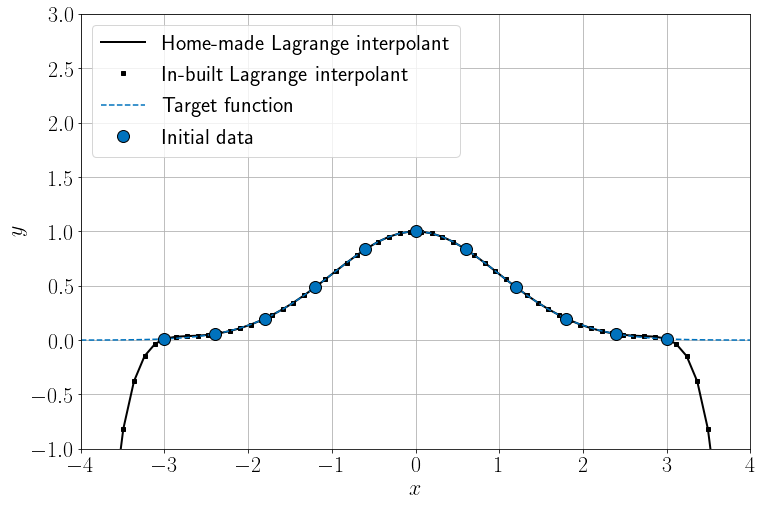

In [96]:
# Set the target interval and number of (equidistant)
# points we wish to sample
xStart = -3.
xEnd = 3.
nPoints = 11

# Create the list of points based on the specifications 
# above (uncomment example function 1/2)
x = np.linspace(xStart, xEnd, num=nPoints)
# Example function 1
y = np.exp(-pow(x,2.)/2.)
# Example function 2
# y = 1/(1+pow(x,2.))

# Generate a finer dataset in order to assist plotting
x_fine = np.linspace(xStart-1, xEnd+1, num=64)
# Example function 1
y_fine = np.exp(-pow(x_fine,2.)/2.)
# Example function 2
# y_fine = 1/(1+pow(x_fine,2.))

# Method 1: Home-made Lagrange interpolant
def home_lagrange(xs,ys):
    n = len(xs)
    p = np.poly1d(0.0)
    for j in range(n):
        current = np.poly1d(ys[j])
        for k in range(n):
            if k != j:
                current = current*np.poly1d([1,-xs[k]])/(xs[j]-xs[k])
        p = p + current
    return p

home_p = home_lagrange(x,y)

# Method 2: In-built functionality
inbuilt_p = lagrange(x, y)


# Plot results
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))

plt.plot(x_fine, home_p(x_fine), "k-", linewidth=2.0, label=r"Home-made Lagrange interpolant")
plt.plot(x_fine, inbuilt_p(x_fine), "ks", markersize = 4, label=r"In-built Lagrange interpolant")
plt.plot(x_fine, y_fine, "--", color = (0, 0.447, 0.741, 1), label=r"Target function")
plt.plot(x, y, "ko", markersize = 12, markerfacecolor=(0, 0.447, 0.741, 1), label=r"Initial data")

plt.legend(loc="upper left")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim([xStart-1, xEnd+1])
plt.ylim([-1, 3])
plt.grid()
plt.show()

**Exercise 1**: modify and extend the above code such that you reproduce the results from Figure 3.4 in the notes.

**Exercise 2**: practice finding the coefficients for simple functions. There are a number of good [resources](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html) out there.